In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
from math import sqrt
import imageio
import numpy as np
from skimage.draw import circle, circle_perimeter,circle_perimeter_aa
from skimage import data, img_as_float
from skimage.feature import blob_log
from skimage.color import rgb2gray, label2rgb
# from skimage.measure import label, regionprops,find_contours
from skimage.filters import difference_of_gaussians
# from skimage.filters import gaussian, threshold_otsu, threshold_multiotsu, difference_of_gaussians
from skimage.segmentation import morphological_geodesic_active_contour, inverse_gaussian_gradient,checkerboard_level_set, morphological_chan_vese
# from scipy import ndimage as ndi


(-0.5, 499.5, 499.5, -0.5)

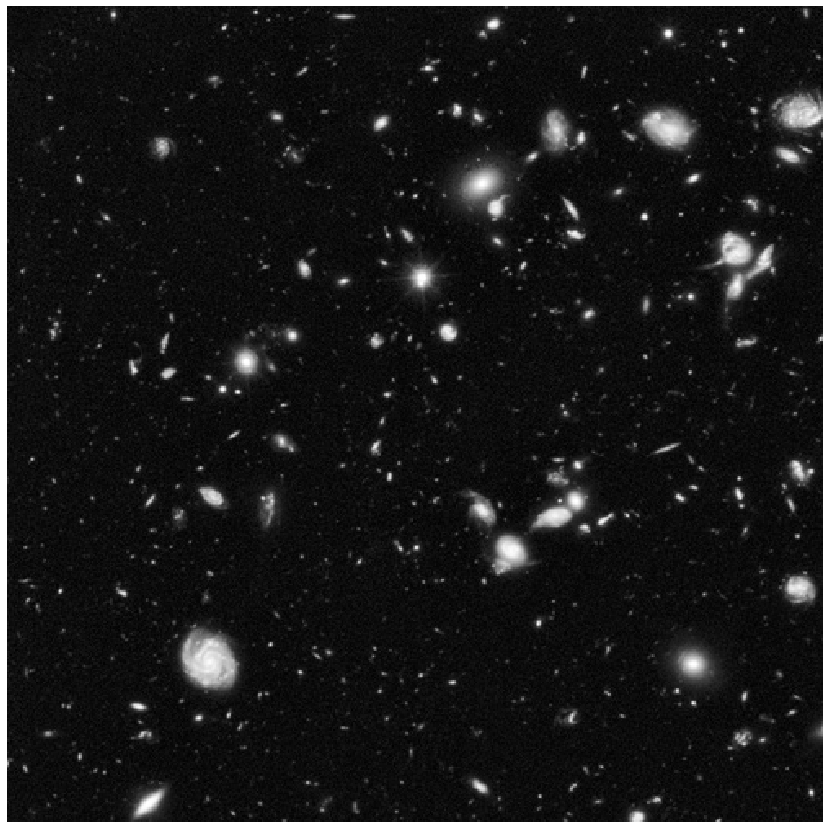

In [9]:
#############
# IMAGE
#############
img_stars = data.hubble_deep_field()[0:500, 0:500]
stars_gray = rgb2gray(img_stars)
rows_img = stars_gray.shape[0]
columns_img = stars_gray.shape[1]

plt.imshow(stars_gray, cmap=plt.cm.gray)
plt.axis('off')

Morphological GAC

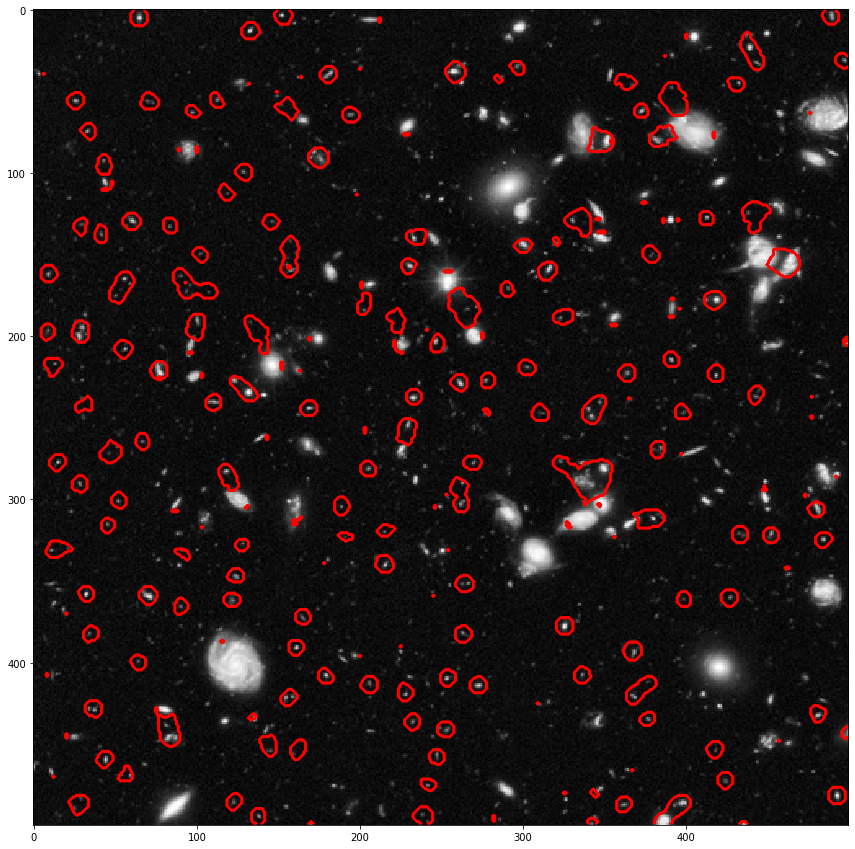

In [19]:
# Morphological GAC

gimage = inverse_gaussian_gradient(stars_gray)
stars_filtered = difference_of_gaussians(stars_gray, low_sigma = 1, high_sigma=7)
init_ls = checkerboard_level_set(stars_gray.shape, 5)
# Initial level set
# init_ls = np.zeros(image.shape, dtype=np.int8)
# init_ls[10:-10, 10:-10] = 1
# # List with intermediate results for plotting the evolution

# ls = morphological_geodesic_active_contour(gimage, 10, init_ls,
#                                            smoothing=1, balloon=-1,
#                                            threshold=0.69)

ls = morphological_geodesic_active_contour(gimage, 1000,  mask)
fig, ax = plt.subplots(1,1)
ax.imshow(stars_gray, cmap="gray")
# ax.set_axis_off()
ax.contour(ls, colors='r')

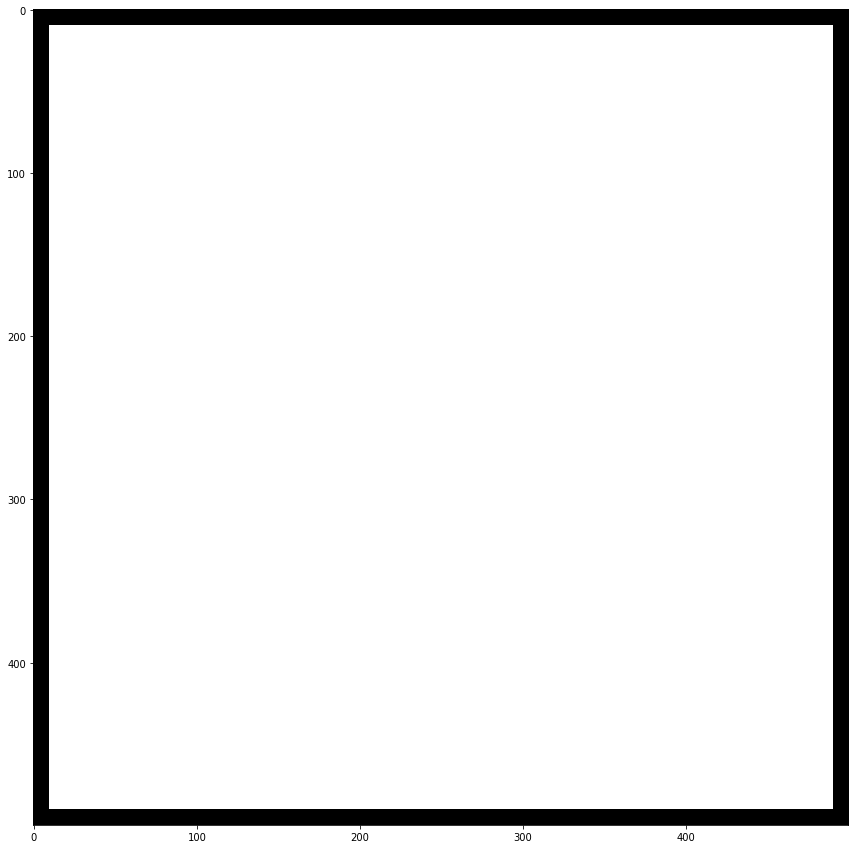

In [11]:
init_ls = np.zeros(stars_gray.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
fig, ax = plt.subplots(1,1)
ax.imshow(init_ls,cmap="gray")

Morphological ACWE

In [12]:
blobs_log = blob_log(stars_gray, min_sigma = 1, max_sigma=30, num_sigma=50, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
# numrows = len(blobs_log)
# print("Number of blobs counted : " ,numrows)
mask = np.zeros_like(stars_gray)
for blob in blobs_log:
    x, y, r = blob
    rr, cc  = circle_perimeter(int(x), int(y), int(r))
    rr[rr >= rows_img] = rows_img-1
    cc[cc >= columns_img] = columns_img-1        
    mask[rr, cc] = 1

Text(0.5, 1.0, 'Morphological ACWE segmentation')

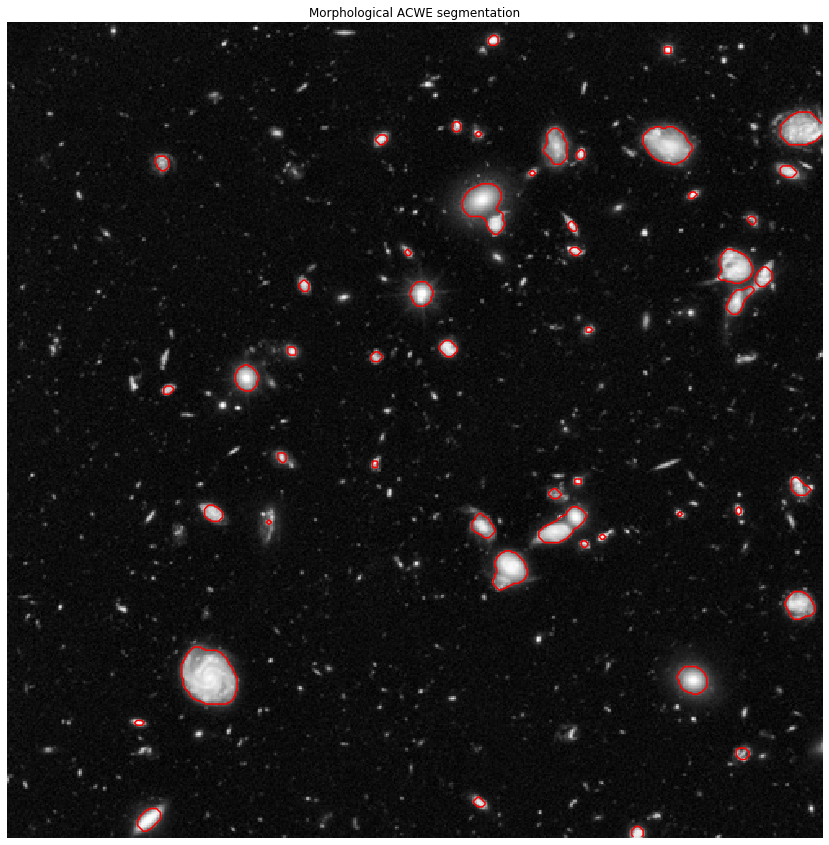

In [16]:
image = stars_gray

# Initial level set
init_ls = checkerboard_level_set(image.shape,6)
# # List with intermediate results for plotting the evolution
# evolution = []
# callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, 170, init_level_set=mask, smoothing=2)

fig, ax = plt.subplots(1,1)
ax.imshow(image, cmap="gray")
ax.set_axis_off()
ax.contour(ls, [0.5], colors='r')
ax.set_title("Morphological ACWE segmentation", fontsize=12)